In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [4]:
x = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [7]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(x_test_scaled)

In [9]:
print('Name:JANNATHUL SHABAN.A')
print('Reg.No:212225220043')
print("MODEL COEFFICIENTS:")
for feature, coef in zip(x.columns, model.coef_):
    print(f"{feature:>12}: {coef:>10}")
print(f"{'Intercept':>12}: {model.intercept_:>10}")

Name:JANNATHUL SHABAN.A
Reg.No:212225220043
MODEL COEFFICIENTS:
  enginesize: 4523.404901011966
  horsepower: 1694.2232554525806
     citympg: -392.5731841571549
  highwaympg: -816.3577991826088
   Intercept: 13223.414634146342


In [10]:
print("\nMODEL PERFORMANCE:")
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rse=np.sqrt(mse)
print(f"{'MSE':>12}: {mse:>10}")
print(f"{'MASE':>12}: {mae:>10}")
print(f"{'RMSE':>12}:{rse:>10}")
print(f"{'R-squared':>12}: {r2_score(y_test,y_pred):>10}")


MODEL PERFORMANCE:
         MSE: 16471505.900042146
        MASE: 2892.628134137953
        RMSE:4058.5103055237087
   R-squared: 0.7913520781370976


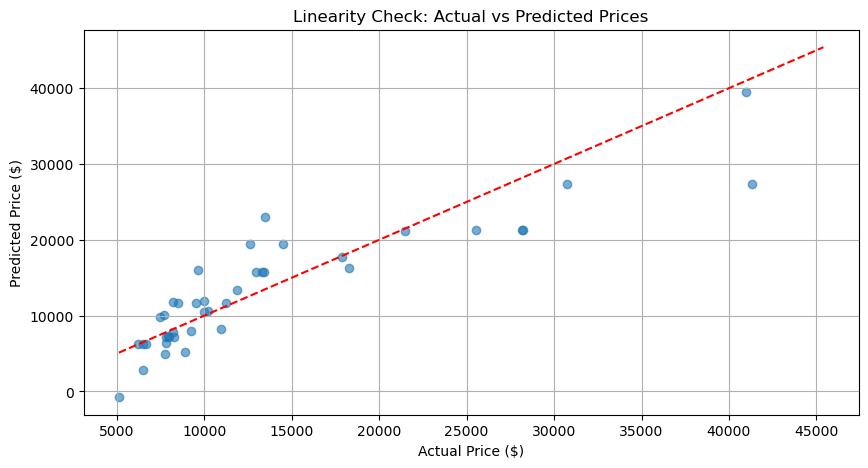

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test,y_pred,alpha=0.6)
plt.plot([y.min(),y.max()],[y.min(), y.max()],'r--')
plt.title("Linearity Check: Actual vs Predicted Prices")
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.grid(True)
plt.show()

In [18]:
residuals = y_test - y_pred
dw_test = sm.stats.durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_test:.2f}",
      "\n(Values close to 2 indicate no autocorrelation)")


Durbin-Watson Statistic: 2.28 
(Values close to 2 indicate no autocorrelation)


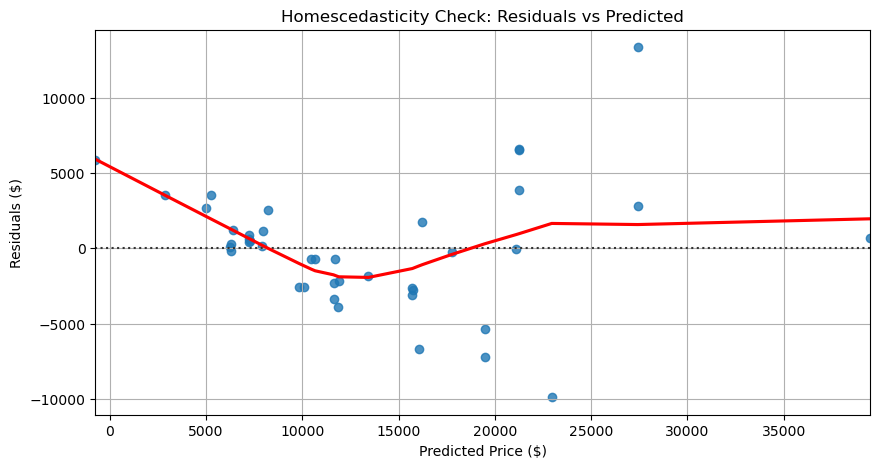

In [19]:
plt.figure(figsize=(10,5))
sns.residplot(x=y_pred, y=residuals, lowess=True,line_kws={'color':'red'})
plt.title("Homescedasticity Check: Residuals vs Predicted")
plt.xlabel("Predicted Price ($)")
plt.ylabel("Residuals ($)")
plt.grid(True)
plt.show()

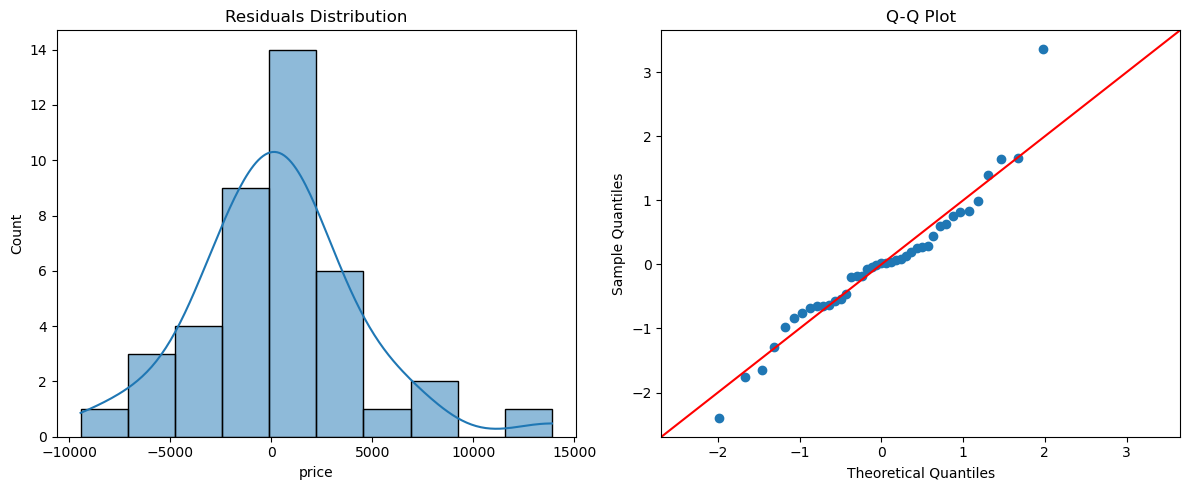

In [21]:
fig, (ax1, ax2)=plt.subplots(1, 2,figsize=(12,5))
sns.histplot(residuals, kde=True, ax=ax1)
ax1.set_title("Residuals Distribution")
sm.qqplot(residuals, line='45',fit=True, ax=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()